In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [224]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [225]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
dtypes: category(5), float32(1), float64(1), int32(1)
memory usage: 15.1 MB


## 데이터 분석
1. InvoiceNo : 거래 번호
2. StockCode : 재고코드
3. Description : 설명
4. Quantity : 주문수량
5. InvoiceDate : 거래 발생 날짜 및 시간
6. UnitPrice : 단가
7. CustomerID : 고객 ID
8. Country : 국가

## 결측치 제거

In [227]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [228]:
# CustomerID가 0 인 사람을 비회원으로 인식
# Description이 없는 Series는 삭제

df['CustomerID'] = df['CustomerID'].fillna(0)
df = df.dropna()

In [229]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## 이상치 제거

In [230]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,540455.000000,540455.000000,540455.000000
mean,9.603129,4.623519,11507.853516
std,218.007598,96.889628,6760.791992
min,-80995.000000,-11062.060000,0.000000
25%,1.000000,1.250000,12367.000000
50%,3.000000,2.080000,14390.000000
75%,10.000000,4.130000,16261.000000
max,80995.000000,38970.000000,18287.000000


In [231]:
df['Quantity'].sort_values(ascending=False).head(5)

540421    80995
61619     74215
502122    12540
421632     4800
206121     4300
Name: Quantity, dtype: int32

In [232]:
df['UnitPrice'].sort_values(ascending=False).head(10)

222681    38970.00
524602    17836.46
43702     16888.02
43703     16453.71
15016     13541.33
15017     13541.33
16356     13541.33
16232     13474.79
524601    11586.50
299982    11062.06
Name: UnitPrice, dtype: float64

In [233]:
df = df[(df['Quantity'] > 0) & (df['Quantity'] < 200)]
df = df[(df['UnitPrice'] > 0) & (df['UnitPrice'] < 300)]

In [234]:
# 약 1만개 이상치 삭제
df.shape

(527707, 8)

## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. \
이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

- pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.

아래의 코드를 활용하세요.

```python
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)

# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()
```

In [235]:
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)
df["CustomerID"] = df["CustomerID"].astype(int)

# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,20.34


In [236]:
df['TotalPrice'].sort_values(ascending=False).head(5)

247994    2598.75
411233    2496.00
16441     2353.68
282261    2102.40
132910    2076.80
Name: TotalPrice, dtype: float64

In [237]:
# 약 30개 이상치 추가 삭제

df = df[df['TotalPrice'] < 1000]

In [238]:
df.shape

(527664, 10)

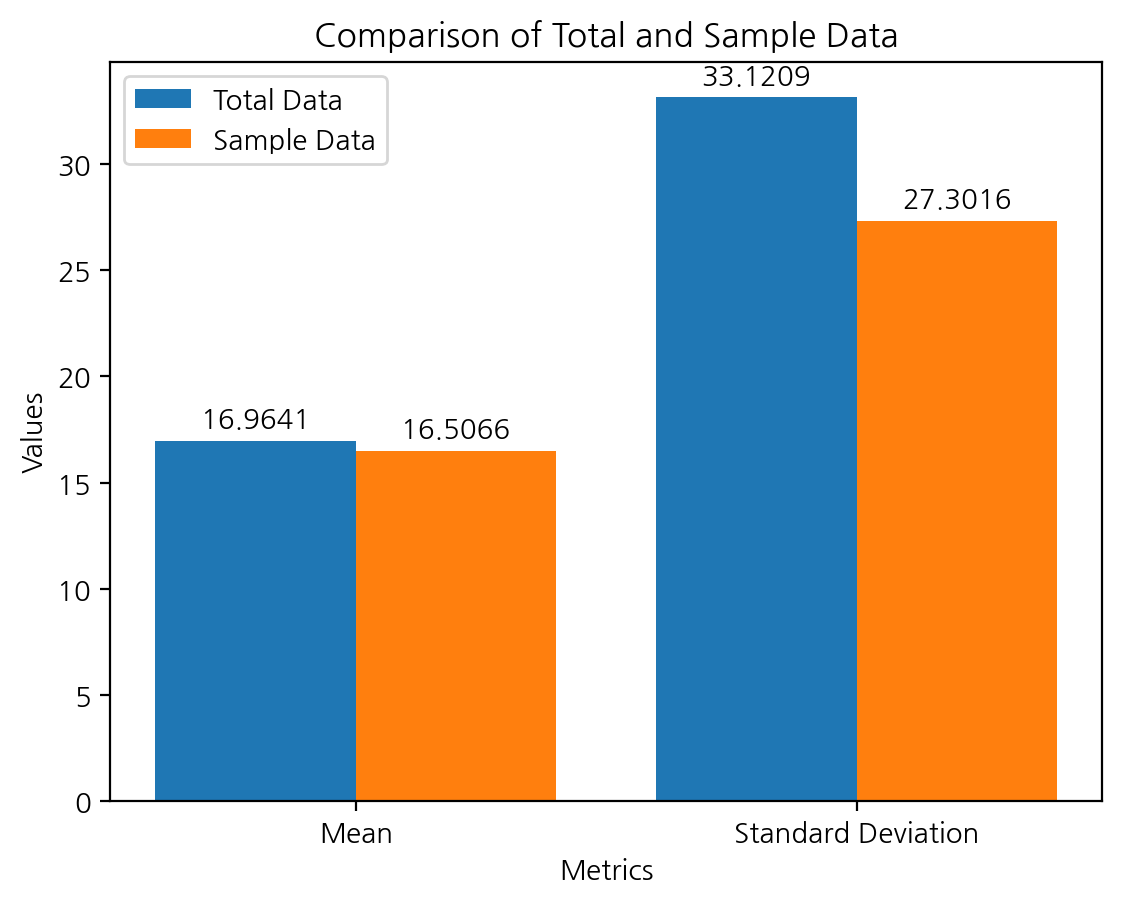

In [239]:
sample_data = df.sample(n=1000, random_state=15)

total_mean = df['TotalPrice'].mean()
total_std = df['TotalPrice'].std()

sample_mean = sample_data['TotalPrice'].mean()
sample_std = sample_data['TotalPrice'].std()

fig, ax = plt.subplots()

width = 0.4

labels = ['Mean', 'Standard Deviation']
x = np.arange(len(labels))

# 막대 그리기
bar1 = ax.bar(x - width/2, [total_mean, total_std], width, label='Total Data')
bar2 = ax.bar(x + width/2, [sample_mean, sample_std], width, label='Sample Data')

# 레이블, 제목, 범례 추가
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Total and Sample Data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(bar1, padding=3)
ax.bar_label(bar2, padding=3)

# 차트 표시
plt.show()

- 모집단과 표본의 평균은 약간 차이가 남
- 중심극한정리에 따라 표본 평균이 모집단 평균에 근사하게 나오는데 이는 중심극한 정리가 잘 적용되었음을 알 수 있음.
- 표준편차가 다른 이유는 모집단에는 전체 데이터가 있어 다양한 값들이 포함되어 있기 때문에 차이가 큼

## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

In [240]:
# 2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요. 영국, 독일

df['Country'].value_counts().head(2)

Country
United Kingdom    483280
Germany             9026
Name: count, dtype: int64

In [241]:
# 4) 각 국가의 'TotalPrice' 평균을 계산하세요.

uk_data = df[df['Country'] == 'United Kingdom']
ger_data = df[df['Country'] == 'Germany']

uk_mean = uk_data['TotalPrice'].mean()
ger_mean = ger_data['TotalPrice'].mean()

print(f"영국의 Total Price 평균 : {uk_mean:0.3f}")
print(f"독일의 Total Price 평균 : {ger_mean:0.3f}")

영국의 Total Price 평균 : 15.610
독일의 Total Price 평균 : 24.912


In [242]:
# 5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.
# 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.

from scipy.stats import ttest_ind

uk_total_price = uk_data.loc[uk_data['Country'] == 'United Kingdom', 'TotalPrice']
germany_total_price = ger_data.loc[ger_data['Country'] == 'Germany', 'TotalPrice']

t_statistic, p_value = ttest_ind(uk_total_price, germany_total_price, equal_var=False)

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

alpha = 0.05  # 유의수준 설정

if p_value < alpha:
    print("두 평균의 차이는 통계적으로 유의미합니다.")
else:
    print("두 평균의 차이는 통계적으로 유의미하지 않습니다.")

t-statistic: -26.460868175766002
p-value: 7.79512159942402e-149
두 평균의 차이는 통계적으로 유의미합니다.


## 6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.
- t-통계량 : 절댓값이 클수록 두 집단의 차이가 크다는 것을 알 수 있음. 그리고 음수가 나왔으므로 영국의 TotalPrice가 독일보다 평균적으로 작다는 것을 나타냄
- p-값 : 귀무가설이 참일 때, 극단적인 값이 나올 확률을 뜻하는데 거의 0에 가까으므로 해당 귀무가설을 기각할 수 있음.

- 1종 오류 : 귀무가설이 참일 때, 귀무가설을 기각. 실제로는 참인데 거짓으로 판단
<br> - 만약 두 나라의 평균이 비슷한데 1종 오류로 인해 큰 차이가 있다고 결론을 지음
- 2종 오류 : 귀무가설이 거짓 일 때, 귀무가설을 채택. 실제로는 거짓인데 참으로 판단
<br> - 만약 두 나라의 평균이 큰데 2종 오류로 인해 차이가 없다고 결론을 지음

## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. \
다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

In [243]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

<Axes: ylabel='TotalPrice'>

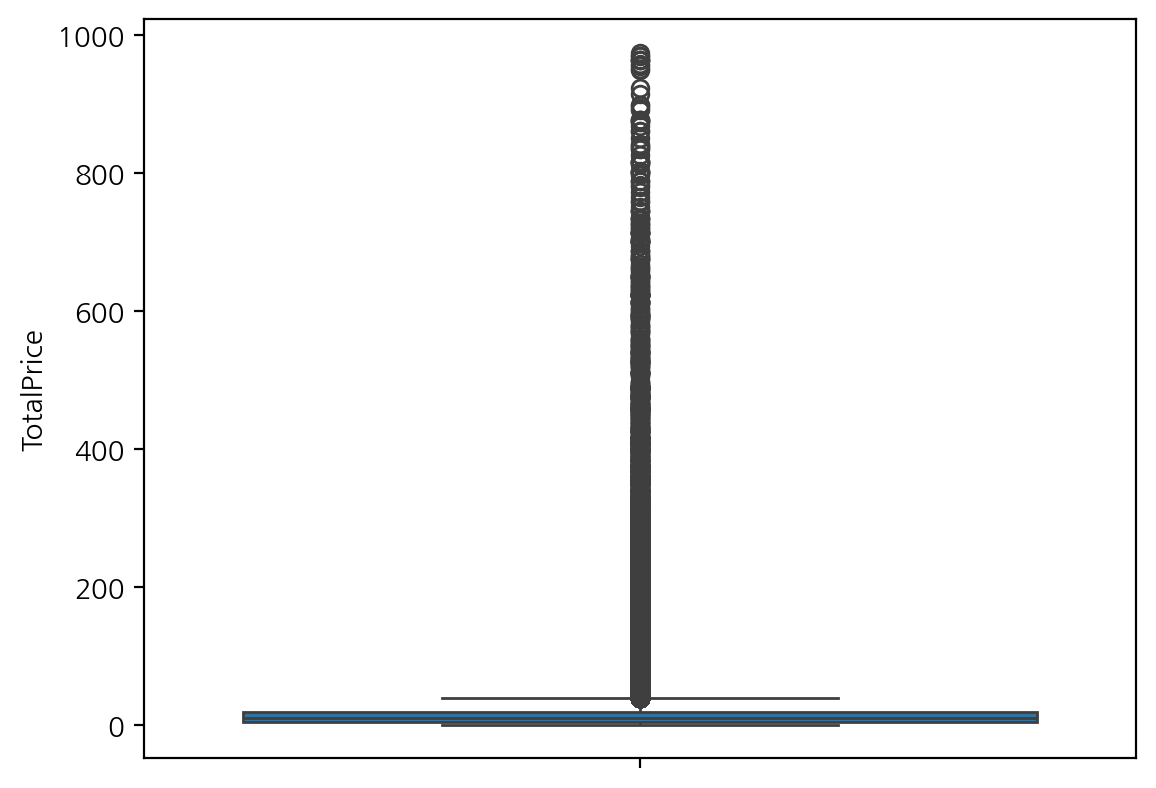

In [244]:
sns.boxplot(y=weekday_data['TotalPrice'])

<Axes: ylabel='TotalPrice'>

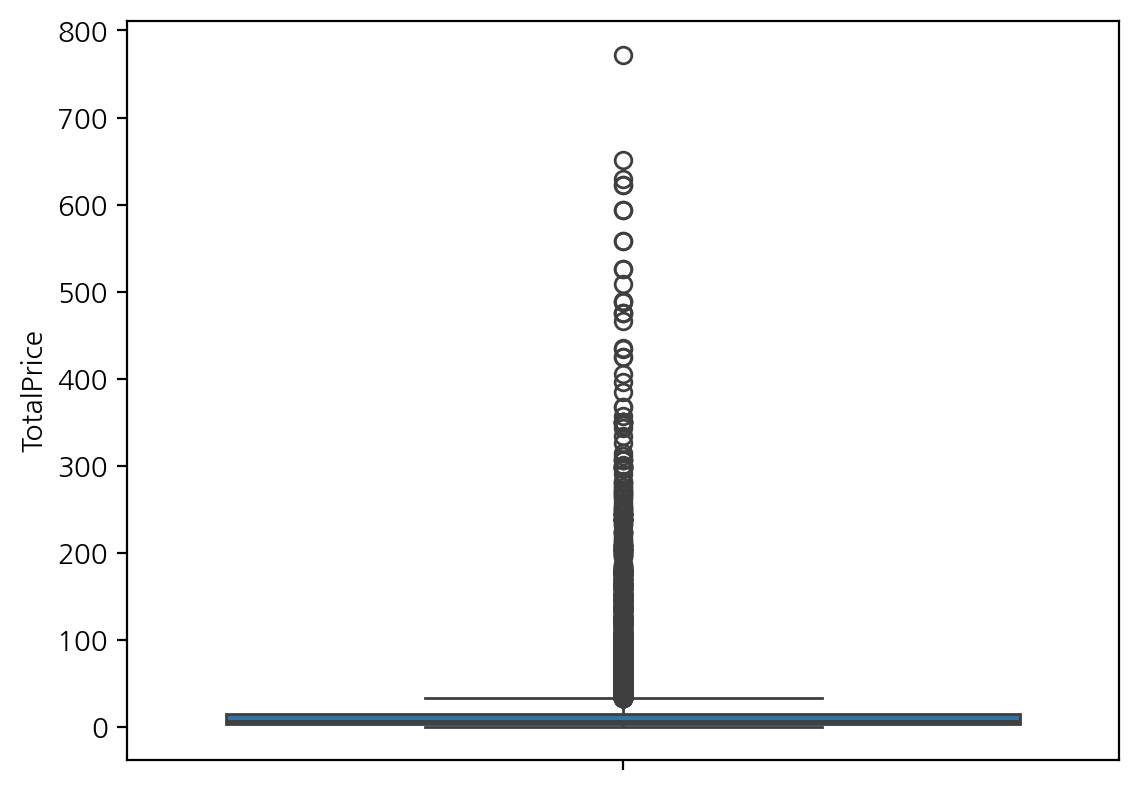

In [245]:
sns.boxplot(y=weekend_data['TotalPrice'])

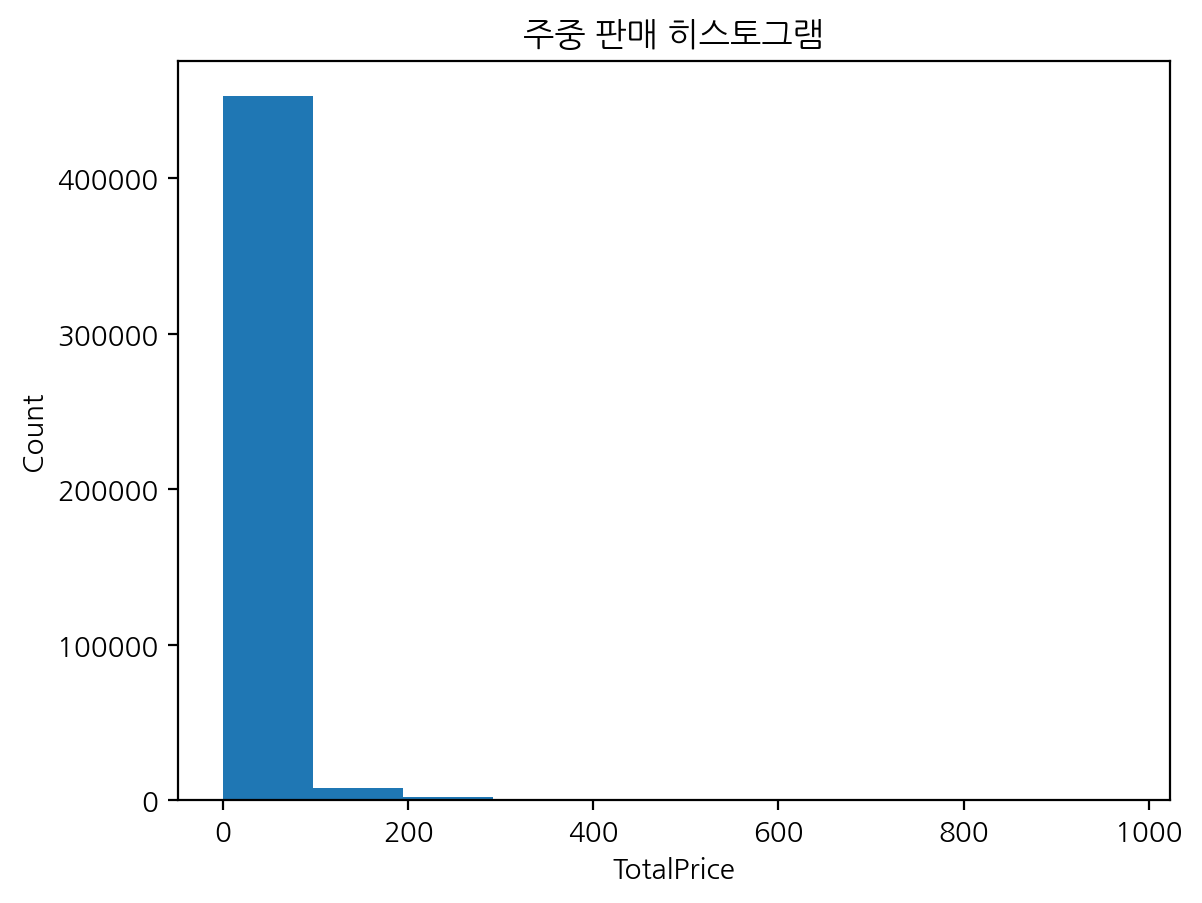

In [246]:
plt.hist(weekday_data['TotalPrice'])
plt.xlabel('TotalPrice')
plt.ylabel('Count')
plt.title('주중 판매 히스토그램')
plt.show()

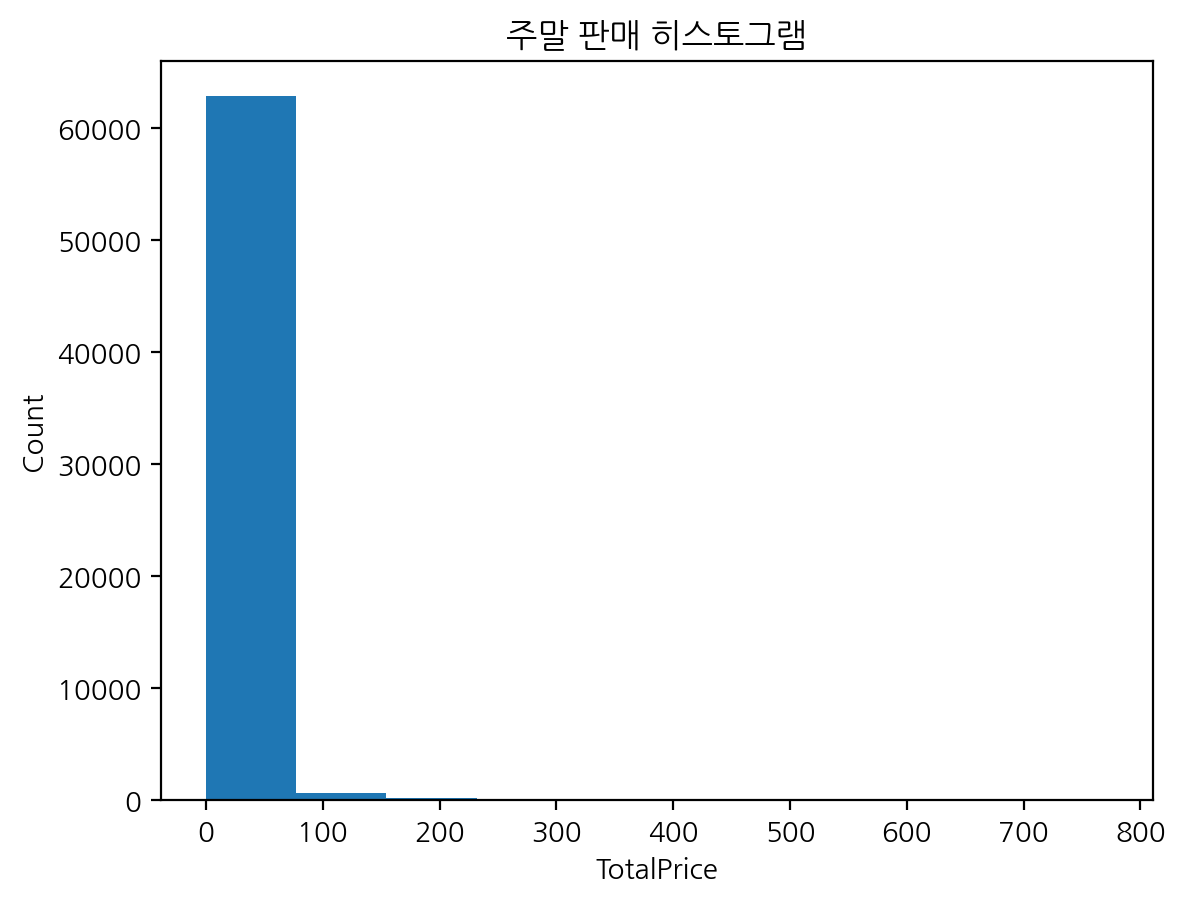

In [247]:
plt.hist(weekend_data['TotalPrice'])
plt.xlabel('TotalPrice')
plt.ylabel('Count')
plt.title('주말 판매 히스토그램')
plt.show()

In [248]:
weekday_data['TotalPrice'].describe()

count    463855.000000
mean         17.615805
std          34.267217
min           0.001000
25%           4.130000
50%          10.000000
75%          17.700000
max         974.050000
Name: TotalPrice, dtype: float64

In [249]:
weekend_data['TotalPrice'].describe()

count    63809.000000
mean        12.226811
std         22.581032
min          0.001000
25%          2.950000
50%          6.360000
75%         15.000000
max        772.200000
Name: TotalPrice, dtype: float64

## 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요.

1. 주중과 주말 데이터를 비교 했을 때, 주중에는 평균적으로 더 많은 금액이 거래가 되는 것을 알 수 있음.
2. 표준편차를 통해 주중에는 주말보다 더 큰 거래 금액이 거래되는 것을 확인할 수 있음
3. 25%와 75%의 데이터를 통해 주중이 좀 더 많은 금액이 거래가 되는 것을 알 수 있음.


## 미션4) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
이를 이용해 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```

In [250]:
# 하위 그룹 데이터 추출
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]

df_group = df[df['Country'].isin(country_group)]

In [251]:
df_group.shape

(1170, 12)

In [252]:
df['TotalPrice'].describe()

count    527664.000000
mean         16.964129
std          33.120862
min           0.001000
25%           3.750000
50%           9.900000
75%          17.400000
max         974.050000
Name: TotalPrice, dtype: float64

In [253]:
df_group['TotalPrice'].describe()

count    1170.000000
mean       43.946632
std        51.220766
min         0.290000
25%        15.000000
50%        23.400000
75%        59.400000
max       429.600000
Name: TotalPrice, dtype: float64

- 전체 판매액 평균은 16.9 이고 하위 그룹의 판매액 평균은 43.9로 약 27정도의 차이를 보임
- 전체적으로 보면 하위 그룹이 좀 더 매출이 좋을 것으로 보이나 데이터 수량이 전체 데이터와 비교하면 적은 데이터이기 때문에 좋게 보일 가능성이 있음

## 미션5) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.\
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalPrice)을 종속변수로 설정하여 회귀분석을 수행합니다.\
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

X = df['UnitPrice']
y = df['TotalPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

print(model_sm.summary())

print("\n회귀계수 해석:")
print(f"절편 (β₀): X가 0일 때, Y의 예측값은 {model_sm.params[0]:.4f}입니다.")
print(f"기울기 (β₁): X가 1단위 증가할 때, Y는 평균적으로 {model_sm.params[1]:.4f} 만큼 증가합니다.")

print("\n유의성 검정 결과:")
for i, p_value in enumerate(model_sm.pvalues):
    if i == 0:
        coef_name = "절편"
    else:
        coef_name = f"X{i}"

    if p_value < alpha:
        print(f"{coef_name}의 p-value({p_value:.4f})가 {alpha}보다 작으므로, 통계적으로 유의합니다.")
    else:
        print(f"{coef_name}의 p-value({p_value:.4f})가 {alpha}보다 크므로, 통계적으로 유의하지 않습니다.")

# 예측 및 평가
X_test_sm = sm.add_constant(X_test)
y_pred = model_sm.predict(X_test_sm)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

                            OLS Regression Results                            
Dep. Variable:             TotalPrice   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                 2.612e+04
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        07:16:06   Log-Likelihood:            -2.0647e+06
No. Observations:              422131   AIC:                         4.129e+06
Df Residuals:                  422129   BIC:                         4.129e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0950      0.055    237.540      0.0

- 회귀계수 : p-value가 0.05보다 작으므로 귀무가설을 부정하며, 우연히 발생한 결과가 아닌 것을 확인할 수 있음.
- 결정계수 : R²는 1에 가까울 수록 모델이 데이터를 잘 설명한다고 볼 수 있는데, 0.05의 낮은 수를 가졌으며, 이는 UnitPrice가 TotalPrice를 예측하는데 영향이 크지 않은 것으로 볼 수 있음

## 미션6) 여러 분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


```python
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= "2010-12-17") & (df_promotion["InvoiceDate"] <= "2010-12-24")
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

In [255]:
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= "2010-12-17") & (df_promotion["InvoiceDate"] <= "2010-12-24")
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")

In [256]:
df_promotion.shape

(41310, 14)

In [257]:
df_promotion[df_promotion['IsChristmasProduct']== True].shape

(2669, 14)

크리스마스 관련 물품은 전체 물품의 약 6%가 팔린 것을 확인

In [258]:
# 전체 시즌 크리스마스 물품과 비관련 물품의 차이 비교
df_promotion_true = df_promotion[df_promotion['IsChristmasProduct']== True]
df_promotion_false = df_promotion[df_promotion['IsChristmasProduct']== False]

In [259]:
# 판매된 크리스마스 관련 물품은 총 106가지

description_counts = df_promotion_true['Description'].value_counts()
description_counts_filtered = description_counts[description_counts >= 1]
print(description_counts_filtered)

Description
PAPER CHAIN KIT 50'S CHRISTMAS         173
PAPER CHAIN KIT VINTAGE CHRISTMAS      137
SET OF 20 VINTAGE CHRISTMAS NAPKINS    100
60 CAKE CASES VINTAGE CHRISTMAS         84
CHRISTMAS TOILET ROLL                   75
                                      ... 
CHRISTMAS TREE T-LIGHT HOLDER            1
PINK FEATHER CHRISTMAS DECORATION        1
3 WICK CHRISTMAS BRIAR CANDLE            1
BLACKCHRISTMAS TREE 30CM                 1
DUSTY PINK CHRISTMAS TREE 30CM           1
Name: count, Length: 106, dtype: int64


In [260]:
df_promotion_true['TotalPrice'].describe()

count    2669.000000
mean       15.358692
std        33.705449
min         0.380000
25%         2.950000
50%         6.720000
75%        15.300000
max       704.080000
Name: TotalPrice, dtype: float64

In [261]:
df_promotion_false['TotalPrice'].describe()

count    38641.000000
mean        16.917594
std         35.146820
min          0.140000
25%          3.750000
50%          8.470000
75%         17.400000
max        974.050000
Name: TotalPrice, dtype: float64

전체 시즌에서는 크리스마스 물품에 대한 차이가 크게 나지 않음

In [262]:
# 크리스마스 시즌 크리스마스 물품과 비관련 물품의 차이 비교
df_promotion_true = df_promotion[(df_promotion['IsChristmasProduct'] == True) & (df_promotion['IsChristmasPeriod'] == True)]
df_promotion_false = df_promotion[(df_promotion['IsChristmasProduct'] == False) & (df_promotion['IsChristmasPeriod'] == True)]

In [263]:
print(df_promotion_true.shape, df_promotion_false.shape)

(389, 14) (7580, 14)


In [264]:
df_promotion_true = df_promotion[(df_promotion['IsChristmasProduct'] == True) & (df_promotion['IsChristmasPeriod'] == True)]
description_counts = df_promotion_true['Description'].value_counts()
description_counts_filtered = description_counts[description_counts >= 1]
print(description_counts_filtered)

Description
PAPER CHAIN KIT VINTAGE CHRISTMAS      15
PAPER CHAIN KIT 50'S CHRISTMAS         15
CHRISTMAS TOILET ROLL                  13
SET OF 20 VINTAGE CHRISTMAS NAPKINS    12
CHRISTMAS CRAFT TREE TOP ANGEL         11
                                       ..
FOLKART STAR CHRISTMAS DECORATIONS      1
CHRISTMAS MUSICAL ZINC TREE             1
WHITE CHRISTMAS GARLAND STARS TREES     1
ROBIN CHRISTMAS CARD                    1
SET OF 6 RIBBONS VINTAGE CHRISTMAS      1
Name: count, Length: 82, dtype: int64


In [265]:
df_promotion_true['TotalPrice'].describe()

count    389.000000
mean      11.245013
std       24.983061
min        0.380000
25%        1.950000
50%        4.250000
75%       10.500000
max      358.810000
Name: TotalPrice, dtype: float64

In [266]:
df_promotion_false['TotalPrice'].describe()

count    7580.000000
mean       15.597263
std        30.824529
min         0.420000
25%         3.750000
50%         7.900000
75%        16.500000
max       815.580000
Name: TotalPrice, dtype: float64

In [267]:
# 비회원 숫자 확인
df_promotion['CustomerID'].value_counts().head(5)

CustomerID
0        15275
12748      668
17850      297
14911      291
17841      287
Name: count, dtype: int64

크리스마스 시즌에도 크리스마스 물품이 많이 팔리지 않았으며 오히려 비관련 물품이 많이 팔리고 수익이 좋은 것을 확인할 수 있음.

- 프로모션 전략
1. 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
2. 비회원의 구매 횟수가 총 15275 번으로 전체 41310 번의 약 1/3을 차지하고 있습니다. 회원 가입 후 혜택으로 크리스마스 물품을 할인하는 캠페인을 실행하면, 사이트의 회원 수도 늘리며 크리스마스 물품을 더욱 더 판매할 수 있을 것이라 예상합니다.
3. 크리스마스 기획전 프로모션을 통해 크리스마스 비물품과 연관된 크리스마스 물품을 노출 시켜 구매를 유도

- 재고 및 공급망 관리
1. 프로모션 이후 판매량을 분석하여 다음 시즌에 대한 수요 예측을 통해 조절

- 상품 다양화
1. 시즌별로 기획전 프로모션으로 다양한 상품에 대한 구매를 유도



## 미션7) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.

```python
from statsmodels.formula.api import ols

# ols.summary()를 이용해 볼 수 있습니다.
```

In [301]:
df_christmas = df_promotion.drop(['InvoiceNo', 'Description', 'StockCode', 'InvoiceDate', 'CustomerID', 'InvoiceMonth','WeekEnd'], axis=1)

In [302]:
df_christmas.head()

,Quantity,UnitPrice,Country,TotalPrice,DayOfWeek,IsChristmasPeriod,IsChristmasProduct
0,6,2.55,United Kingdom,15.30,2,False,False
1,6,3.39,United Kingdom,20.34,2,False,False
2,8,2.75,United Kingdom,22.00,2,False,False
3,6,3.39,United Kingdom,20.34,2,False,False
4,6,3.39,United Kingdom,20.34,2,False,False


In [305]:
df_christmas['Quantity'] = df_christmas['Quantity'].astype(int)
df_christmas['DayOfWeek'] = df_christmas['DayOfWeek'].astype(int)
df_christmas['IsChristmasProduct'] = df_christmas['IsChristmasProduct'].astype(int)
df_christmas['IsChristmasPeriod'] = df_christmas['IsChristmasPeriod'].astype(int)

In [290]:
df_christmas = pd.get_dummies(df_christmas, columns=['Country'])

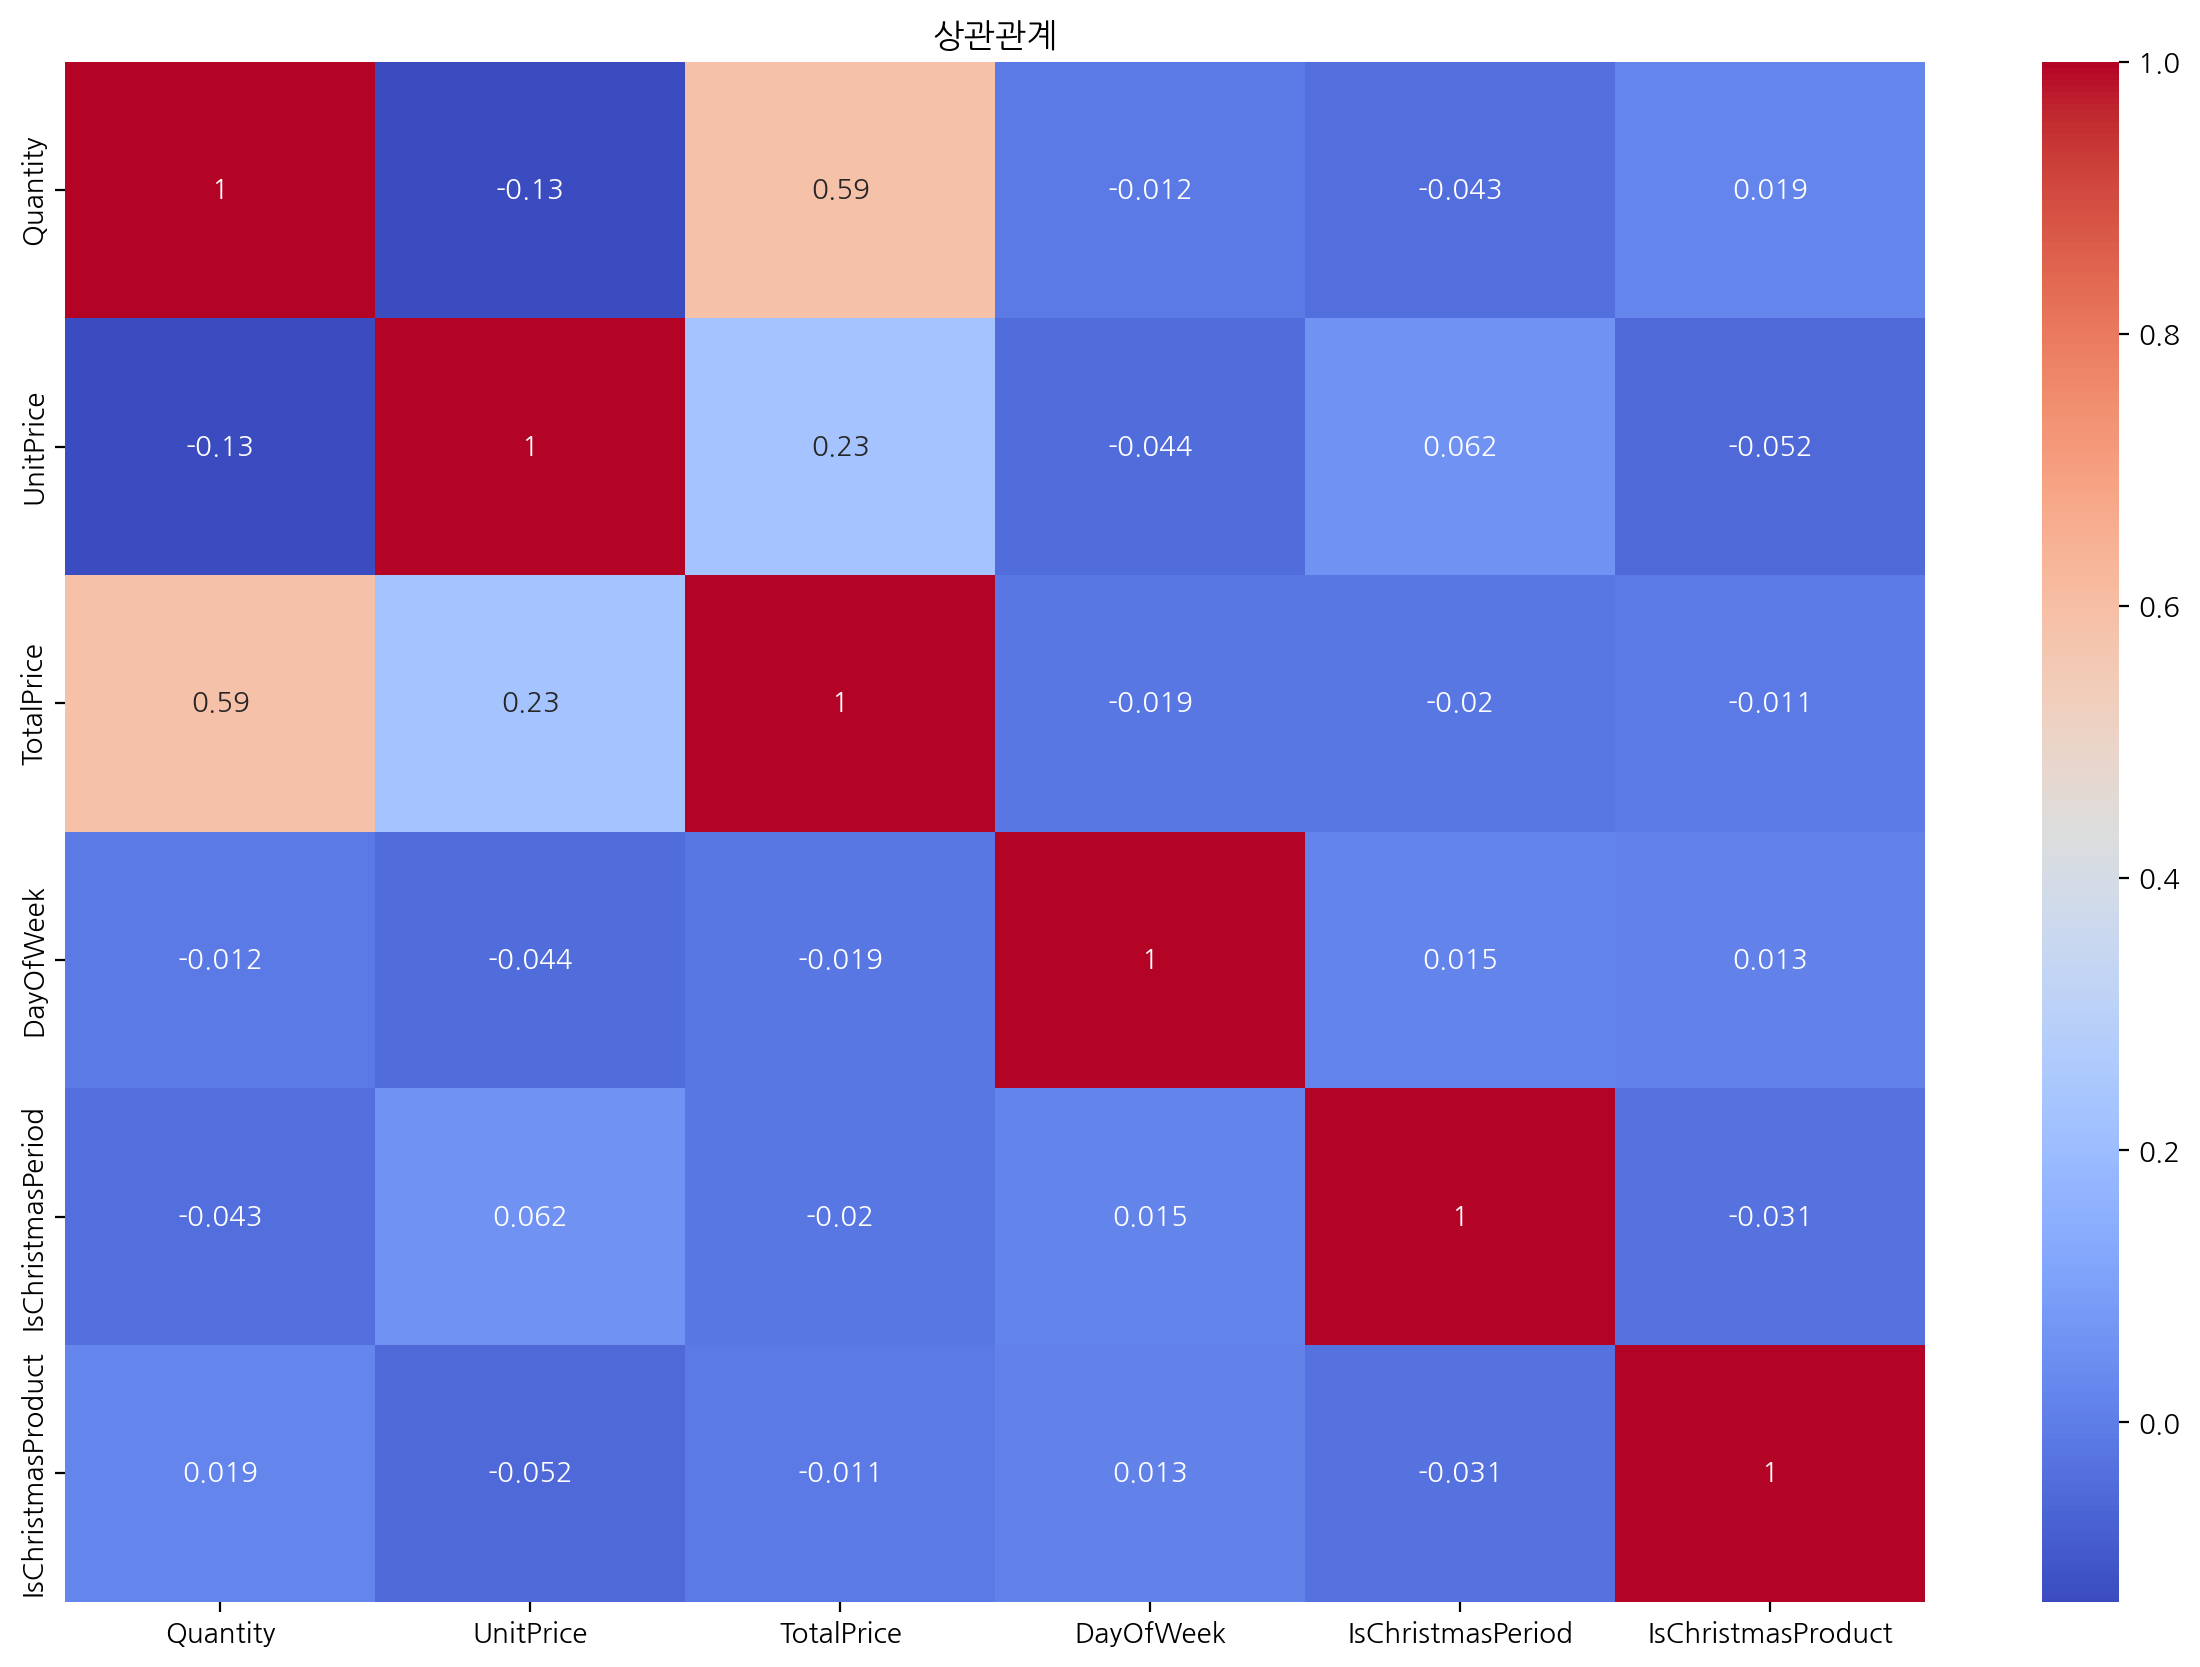

In [306]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_christmas.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('상관관계')
plt.show()

In [314]:
from statsmodels.formula.api import ols

model = ols(formula = 'Quantity ~ UnitPrice + TotalPrice + IsChristmasPeriod + IsChristmasProduct + Country', data = df_christmas).fit()

In [315]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     1301.
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        07:47:42   Log-Likelihood:            -1.5728e+05
No. Observations:               41310   AIC:                         3.146e+05
Df Residuals:                   41283   BIC:                         3.149e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## 결과 분석
1. 모델 요약
- R-squared : 0.450<br>
모델이 예측을 중간정도 하는 것으로 볼 수 있음
- P-value : 0.00<br>
0을 나타내므로 모델이 유의미하다는 것을 알 수 있음
2. 회귀계수
- UnitPrice : -0.6512(p < 0.0001)<br>
단위 가격이 1 증가할 때마다 판매 수량이 0.6512씩 감소를 함
- TotalPrice : 0.2645(p < 0.0001)<br>
총 가격이 1 증가할 때마다 판매 수량이 0.2645씩 증가함
- IsChristmasPeriod : -0.9377(p < 0.0001)<br>
크리스마스 기간에 판매 수량이 0.9377씩 감소함
- IsChristmasProduct : 0.8467(p < 0.0001)<br>
크리스마스 상품의 경우 판매 수량이 0.8467씩 증가함

3. 모델이 유의미한 국가
- Belgium: 7.1428 (p = 0.001)
- Finland: 52.6883 (p < 0.0001)
- Japan: 16.7724 (p < 0.0001)
- Netherlands: 30.5624 (p < 0.0001)
- Norway: 9.6262 (p < 0.0001)
- Sweden: 55.2966 (p < 0.0001)

이며, 나머지 국가들은 p-value가 0.05보다 높아 판매 수량에 대한 유의미한 차이를 나타내지 않음

4. 오차의 정상성 테스트
- Omnibus : 39275.933<br>
잔차의 정상성을 검정. 값이 매우 크므로 잔차가 정규분포를 따르지 않음
- Durbin-Watson: 1.256<br>
잔차의 자기 상관을 테스트 2에 가까울수록 자기 상관이 없음을 의미하며, 1.256은 양의 자기 상관을 의미함
- Skew : 4.114<br>
잔차의 왜도 이며, 0에서 멀어질수록 비대칭성이 크므로, 해당 모델은 비대칭함을 알 수 있음
- Kurtosis : 66.698<br>
잔차의 첨도 이며, 정규분포는 3이지만, 66.698은 극단값이 많다는 것을 의미함.

## 결론
- TotalPrice, UnitPrice, IsChristmasPeriod, IsChristmasProduct은 유의미한 변수이며, 일부 국가들은 유의미한 변수가 아님을 나타냄
- 해당 데이터는 정규분포를 따르지 않아, 모델의 적합성을 평가할 때 고려해야 됨.

## 크리스마스 시즌 판매 전략
1. 크리스마스 시즌에 판매량이 자체가 감소하는 경향이 보이므로, 크리스마스 기간 동안 기획전 프로모션을 통해 크리스마스 시즌에 구매하는 고객이 늘어나도록 유도하도록 제안
2. 모델이 유의미한 국가에 집중하여 해당 국가에 대한 특별 프로모션과 광고를 집중 강화하도록 제안
3. 크리스마스 상품의 경우 묶음 상품으로 판매를 하여 한번에 구매하도록 제안
4. 크리스마스 상품을 특정 금액 넘게 구매할 경우 사은품을 증정

## 미션8) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.\
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.\
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩 등을 사용할 수 있습니다.\
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\
5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.

In [319]:
buy_description = df.drop(['InvoiceNo', 'StockCode', 'InvoiceDate', 'DayOfWeek', 'WeekEnd'], axis=1)

In [321]:
# 구매 여부 컬럼 생성
buy_description['buy'] = buy_description['Description'].apply(lambda x: 'WHITE HANGING HEART T-LIGHT HOLDER' in x)

In [325]:
buy_description.drop(['Description'], axis=1, inplace=True)

In [327]:
buy_description.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527664 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Quantity      527664 non-null  int32  
 1   UnitPrice     527664 non-null  float64
 2   CustomerID    527664 non-null  int64  
 3   Country       527664 non-null  object 
 4   InvoiceMonth  527664 non-null  int32  
 5   TotalPrice    527664 non-null  float64
 6   buy           527664 non-null  bool   
dtypes: bool(1), float64(2), int32(2), int64(1), object(1)
memory usage: 40.8+ MB


In [335]:
buy_description = pd.get_dummies(buy_description, columns=['Country'])

In [336]:
from sklearn.preprocessing import StandardScaler

# 데이터 분할
X_train = buy_description.drop(['buy'], axis=1)
y_train = buy_description['buy']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [337]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [338]:
# 모델 평가

y_pred = model.predict(X_val)
from sklearn.metrics import accuracy_score, classification_report

print("\n모델 정확도:", accuracy_score(y_val, y_pred))
print("\n분류 보고서:")
print(classification_report(y_val, y_pred))


모델 정확도: 0.995953872248491

분류 보고서:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    105107
        True       0.00      0.00      0.00       426

    accuracy                           1.00    105533
   macro avg       0.50      0.50      0.50    105533
weighted avg       0.99      1.00      0.99    105533



## 모델 평가
높은 정확도를 보이고 있으나 해당 모델은 과적합의 가능성의 여부도 판단해야 됨.

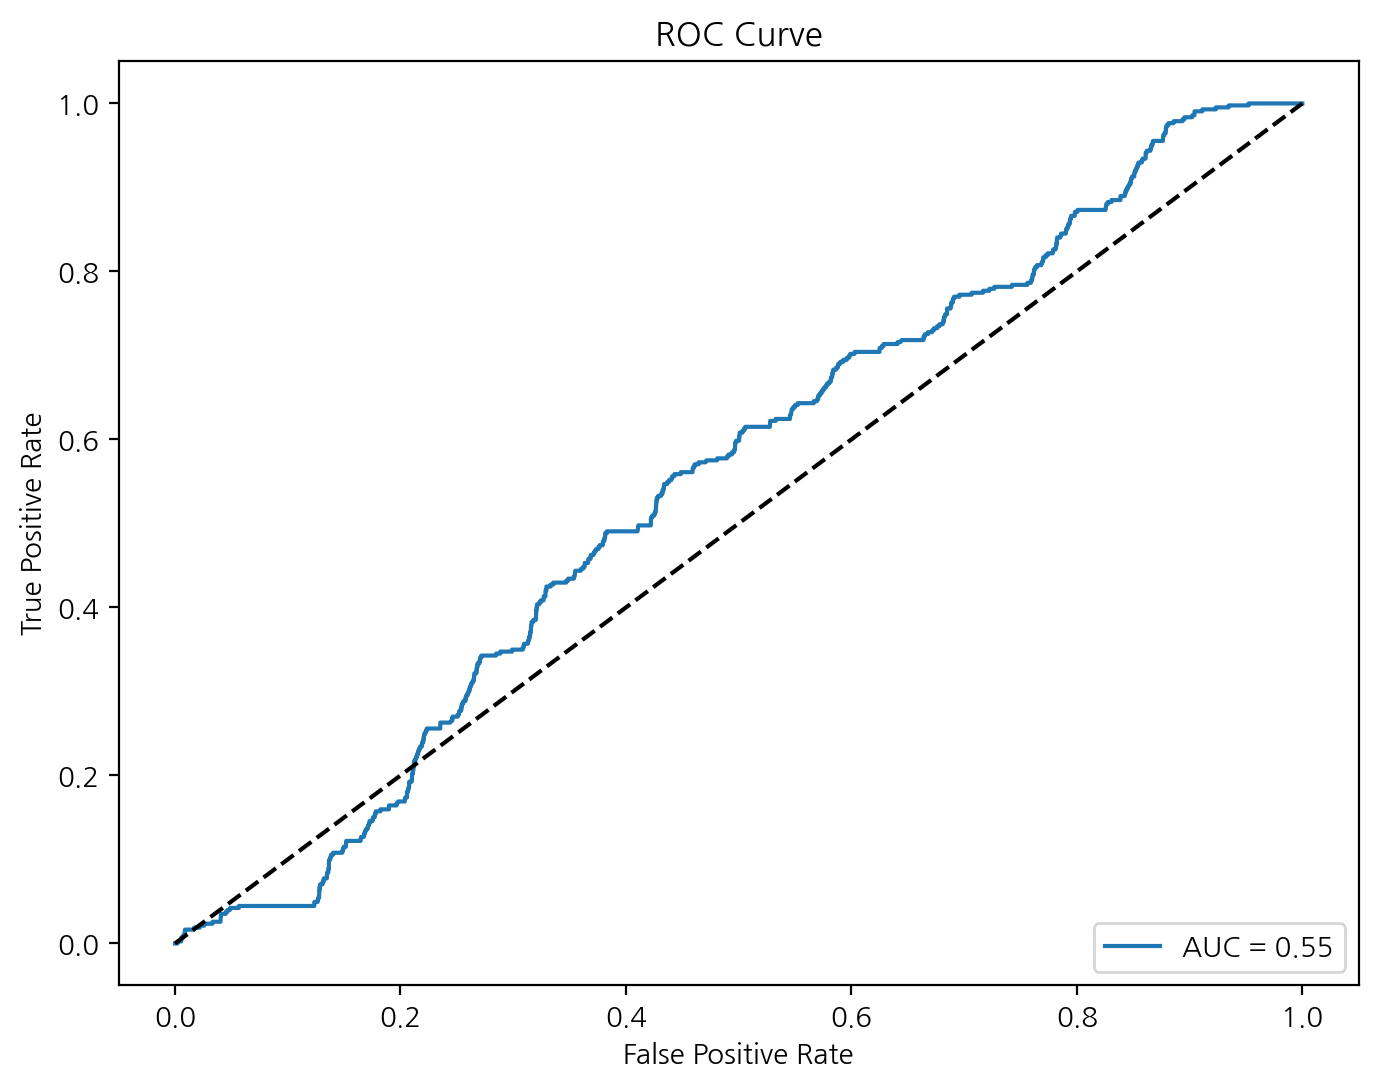

In [339]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC 곡선 및 AUC 계산
y_prob = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
auc = roc_auc_score(y_val, y_prob)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

AUC 값이 높을수록 모델의 성능이 좋음을 나타내지만 0.55는 모델의 성능이 그렇게 좋은 편이 아님을 알 수 있음